<a href="https://colab.research.google.com/github/HarshJain41/Global-Terrorism-Data-Analysis/blob/main/Harsh_Jain_Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

## Importing The Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading The Dataset and checking its shape

In [3]:
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter Canberra/Module 1 - Python For Data Science/Capstone Project 1 - EDA on Global Terrorism/Copy of Global Terrorism Data.csv', encoding = 'latin1', low_memory = False)
# encoding  = 'latin1' is because of big dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [6]:
df.shape

(181691, 135)

In [7]:
# Here we have 135 columns, let's see what are they
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [8]:
df.isnull().sum().values  ###The values in the array are the count of null values that each column have.

array([     0,      0,      0,      0, 172452,      0, 179471,      0,
            0,      0,      0,    421,    434,   4556,   4557,      6,
            0, 126196,  66129,      0,      0,      0,      1, 152680,
       152680,      1,      0,      0,      0,      0, 175377, 175377,
       181263, 181263,      0,      0,  10373,  10373,  42550,    636,
         1559,   1559, 170547, 170547, 171006, 171006, 171574, 170671,
       170863, 170863, 180515, 180515, 180594, 180594, 180665, 180516,
       180544, 180544,      0, 175801, 179678, 181531, 181367, 181671,
       131130,    380, 179736, 181371,      0,  71115,  69489,  66120,
       162608, 162608, 179801, 181075, 181075, 181373, 181558, 181558,
       176852,      0,      0,  20768,  20768, 168564, 168564, 170149,
       170149, 179828, 179828, 179998, 179998, 181618, 181618, 181621,
       181621,  67670,  10313,  64446,  66958,  16311,  64702,  69143,
            0, 117626, 117626, 142702, 123732,    178, 168119, 168174,
      

### It looks like many of these columns are of no use, and have many null values in them. So, In next step we will filter out the most important columns for our data analysis.

## Filtering the Culumns - 
#### Here I've created a new dataframe that contains only those columns that seems important for data analysis.

In [9]:
new_df = df[['iyear', 'imonth', 'iday', 'provstate',
                     'country_txt', 'region_txt',
                     'city', 'latitude', 'longitude', 'location', 'summary', 'success', 'suicide', 'attacktype1_txt',
                      'targtype1_txt', 'gname', 'weaptype1_txt', 'nkill', 'nwound', 'motive']]

In [10]:
#Renaming the Column Names-:

new_df = new_df.rename(columns = {'iyear':'year', 'imonth':'month', 
                                   'iday': 'day', 'country_txt':'country', 'region_txt':'region', 'provstate':'state',          
                                   'city': 'city', 'latitude':'Latitude', 'longitude':'Longitude', 
                                   'location':'location', 'summary':'Summary', 'success':'Success', 'suicide':'Suicide',
                                   'attacktype1_txt':'attack_type', 'targtype1_txt':'target_type', 
                                   'gname':'group_name', 'weaptype1_txt':'weapon_type', 'nkill':'killed',
                                   'nwound':'wounded', 'motive':'Motive'})

In [11]:
new_df.head()

,year,month,day,state,country,region,city,Latitude,Longitude,location,Summary,Success,Suicide,attack_type,target_type,group_name,weapon_type,killed,wounded,Motive
0,1970,7,2,NaN,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,NaN,NaN,1,0,Assassination,Private Citizens & Property,MANO-D,Unknown,1.0,0.0,NaN
1,1970,0,0,Federal,Mexico,North America,Mexico city,19.371887,-99.086624,NaN,NaN,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,0.0,0.0,NaN
2,1970,1,0,Tarlac,Philippines,Southeast Asia,Unknown,15.478598,120.599741,NaN,NaN,1,0,Assassination,Journalists & Media,Unknown,Unknown,1.0,0.0,NaN
3,1970,1,0,Attica,Greece,Western Europe,Athens,37.997490,23.762728,NaN,NaN,1,0,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,NaN,NaN,NaN
4,1970,1,0,Fukouka,Japan,East Asia,Fukouka,33.580412,130.396361,NaN,NaN,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,NaN,NaN,NaN


In [12]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 20 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   year         181691 non-null  int64  
 1   month        181691 non-null  int64  
 2   day          181691 non-null  int64  
 3   state        181270 non-null  object 
 4   country      181691 non-null  object 
 5   region       181691 non-null  object 
 6   city         181257 non-null  object 
 7   Latitude     177135 non-null  float64
 8   Longitude    177134 non-null  float64
 9   location     55495 non-null   object 
 10  Summary      115562 non-null  object 
 11  Success      181691 non-null  int64  
 12  Suicide      181691 non-null  int64  
 13  attack_type  181691 non-null  object 
 14  target_type  181691 non-null  object 
 15  group_name   181691 non-null  object 
 16  weapon_type  181691 non-null  object 
 17  killed       171378 non-null  float64
 18  wounded      165380 non-

In [13]:
new_df.isnull().sum()

year                0
month               0
day                 0
state             421
country             0
region              0
city              434
Latitude         4556
Longitude        4557
location       126196
Summary         66129
Success             0
Suicide             0
attack_type         0
target_type         0
group_name          0
weapon_type         0
killed          10313
wounded         16311
Motive         131130
dtype: int64

In [14]:
# Here, I've added a new column called Casualty to collect statistics on the overall number of persons affected by terrorist attacks for each observation.

new_df["killed"] = new_df['killed'].fillna(0)
new_df["wounded"] = new_df["wounded"].fillna(0)
new_df["Casuality"] = new_df["killed"]+new_df["wounded"]


In [15]:
new_df.head()

,year,month,day,state,country,region,city,Latitude,Longitude,location,...,Success,Suicide,attack_type,target_type,group_name,weapon_type,killed,wounded,Motive,Casuality
0,1970,7,2,NaN,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,NaN,...,1,0,Assassination,Private Citizens & Property,MANO-D,Unknown,1.0,0.0,NaN,1.0
1,1970,0,0,Federal,Mexico,North America,Mexico city,19.371887,-99.086624,NaN,...,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,0.0,0.0,NaN,0.0
2,1970,1,0,Tarlac,Philippines,Southeast Asia,Unknown,15.478598,120.599741,NaN,...,1,0,Assassination,Journalists & Media,Unknown,Unknown,1.0,0.0,NaN,1.0
3,1970,1,0,Attica,Greece,Western Europe,Athens,37.997490,23.762728,NaN,...,1,0,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,0.0,0.0,NaN,0.0
4,1970,1,0,Fukouka,Japan,East Asia,Fukouka,33.580412,130.396361,NaN,...,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,0.0,0.0,NaN,0.0


In [16]:
new_df.describe()

,year,month,day,Latitude,Longitude,Success,Suicide,killed,wounded,Casuality
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,0.889598,0.036507,2.266860,2.883296,5.150156
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,0.313391,0.187549,11.227057,34.309747,40.555416
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,1.000000,0.000000,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,1.000000,0.000000,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1.000000,1.000000,1570.000000,8191.000000,9574.000000


# Observation Till Now:


1.   Maximum number of People killed in an event were - 1570
2.   Maximum number of People wounded in an event were - 8191
3.   Maximum number of casualities in an event were - 9574




## 1. Yearwise Visualisation Of Number of Terrorist Activities

In [17]:
attacks = new_df['year'].value_counts(dropna = False).sort_index().reset_index().rename(columns = {'index':'Year', 'year':'Attacks'}).set_index('Year')

In [18]:
attacks.head()

,Attacks
Year,
1970,651
1971,471
1972,568
1973,473
1974,581


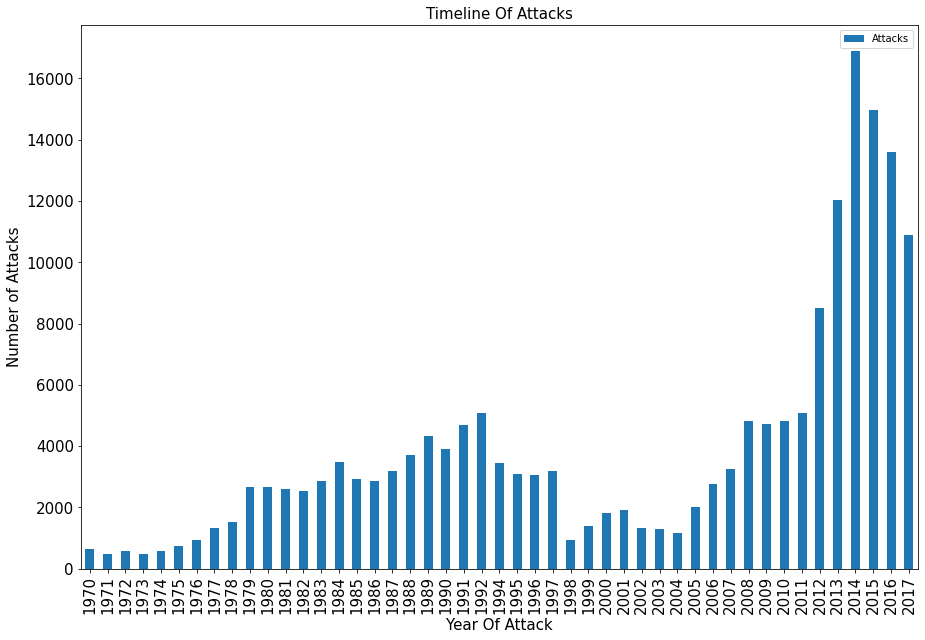

In [19]:
#Plotting the bar graph between the years and number of attacks each year
attacks.plot(kind = 'bar', figsize = (15,10), fontsize = 15)
plt.title('Timeline Of Attacks', fontsize = 15)
plt.xlabel('Year Of Attack', fontsize = 15)
plt.ylabel('Number of Attacks', fontsize = 15)
plt.show()

#### Here, from the above visualisation we can see that Maximum Number of Attacks happened in the year of 2014, i.e. 16903. And the minimum Number of Attacks happened in the year of 1971, i.e. 471.

In [20]:
casualities = new_df[["year","Casuality"]].groupby("year").sum()

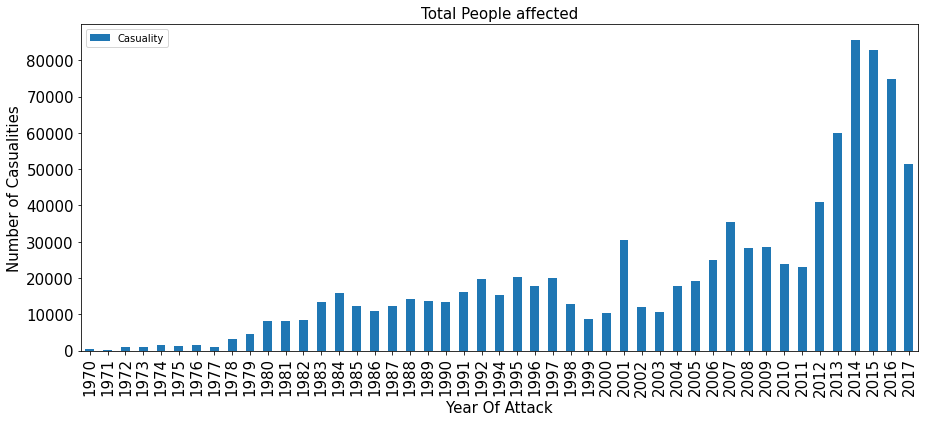

In [21]:
casualities.plot(kind = 'bar', figsize = (15,6), fontsize = 15)
plt.title('Total People affected', fontsize = 15)
plt.xlabel('Year Of Attack', fontsize = 15)
plt.ylabel('Number of Casualities', fontsize = 15)
plt.show()

#### It can also be seen that while 2014 was the year with the most attacks, it was also the year with the most casualties.

## 2. Correlation Analysis

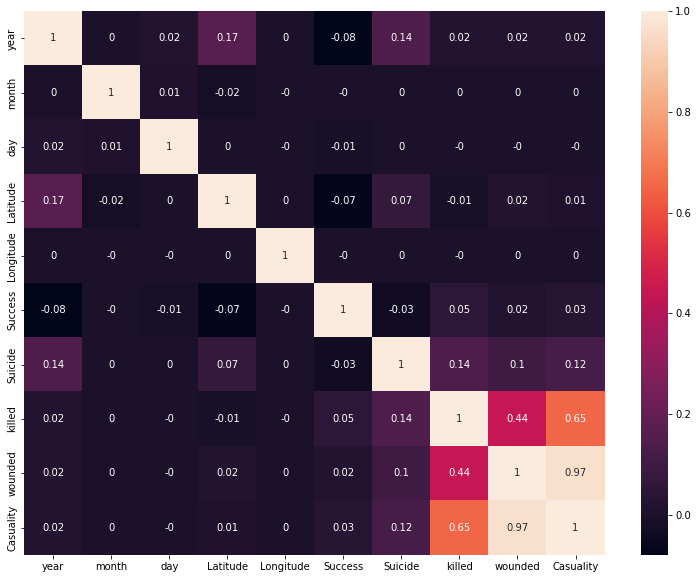

In [22]:
plt.figure(figsize = (13,10))
#This will show how much one parameter is related to the other in our data
sns.heatmap(np.round(new_df.corr(), 2), annot = True)  #np.round is used to round the values of correlation to 2 decimal points

#### Here we can see that wounded and Casuality are highly correlated i.e. = 97%
#### And killed and Casuality are second highly correlated values i.e. 65%
#### killed and wounded are 2 values with correlation 44%

## 3. Terrorist Activities in each Region through Area Plot

In [23]:
region = pd.crosstab(new_df.year,new_df.region)
region.head()

region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
year,,,,,,,,,,,,
1970,1,7,0,2,12,28,472,65,1,10,3,50
1971,1,5,0,1,5,55,247,24,0,6,2,125
1972,8,3,0,0,1,53,73,33,1,16,4,376
1973,1,6,0,2,1,19,64,83,1,2,4,290
1974,1,11,0,4,2,42,111,81,2,3,7,317


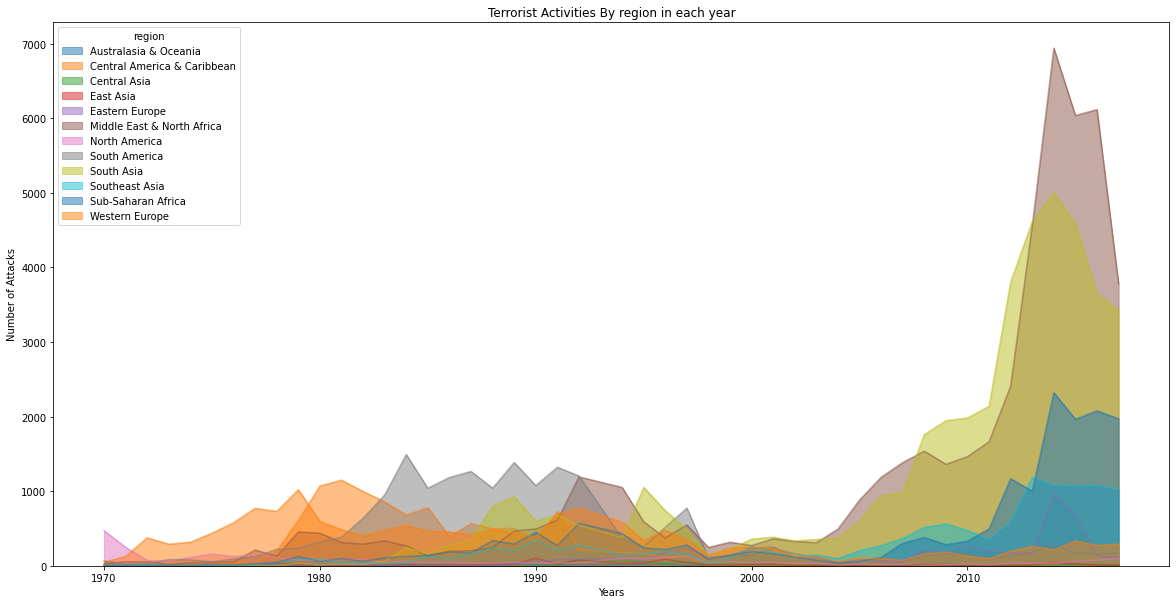

In [24]:
region.plot(kind = 'area', stacked = False, figsize = (20,10))
plt.title('Terrorist Activities By region in each year')
plt.xlabel('Years')
plt.ylabel('Number of Attacks')
plt.show()

#### According to the plot above, there is a peak increase in attacks after 2010 in almost every region, with the Middle East and North African nations topping the list due to the highest number of attacks, and then comes South asian countries at the second position.

#### Middle East and North African Countries - Algeria, Bahrain, Egypt, Iran, Iraq, Israel, Jordan, Kuwait, Lebanon, Libya, Morocco, Oman, Qatar, Saudi Arabia, Syria, Tunisia, United Arab Emirates and Yemen.

#### South Asian Countries - Afghanistan, Bangladesh, Bhutan, India, Iran, Maldives, Nepal, Pakistan, and Sri Lanka.

## 4. Percentage with which attacks have been increased from 1970 to 2017. What could be the reason behind this increase?

In [25]:
 Year = new_df.year.value_counts().to_dict() #This will give dictionary containing the year as key and number of attacks in that particular year as value
 rate = ((Year[2017] - Year[1970])/Year[2017])*100
 print(Year[1970], 'attacks happened in 1970 &', Year[2017], 'attacks happened in 2017')
 print('So the percentage at which the number of attacks have increased from 1970 to 2017 is: ', np.round(rate, 2),'%')

651 attacks happened in 1970 & 10900 attacks happened in 2017
So the percentage at which the number of attacks have increased from 1970 to 2017 is:  94.03 %


## 5. What weapons are mostly used in order to execute attacks?

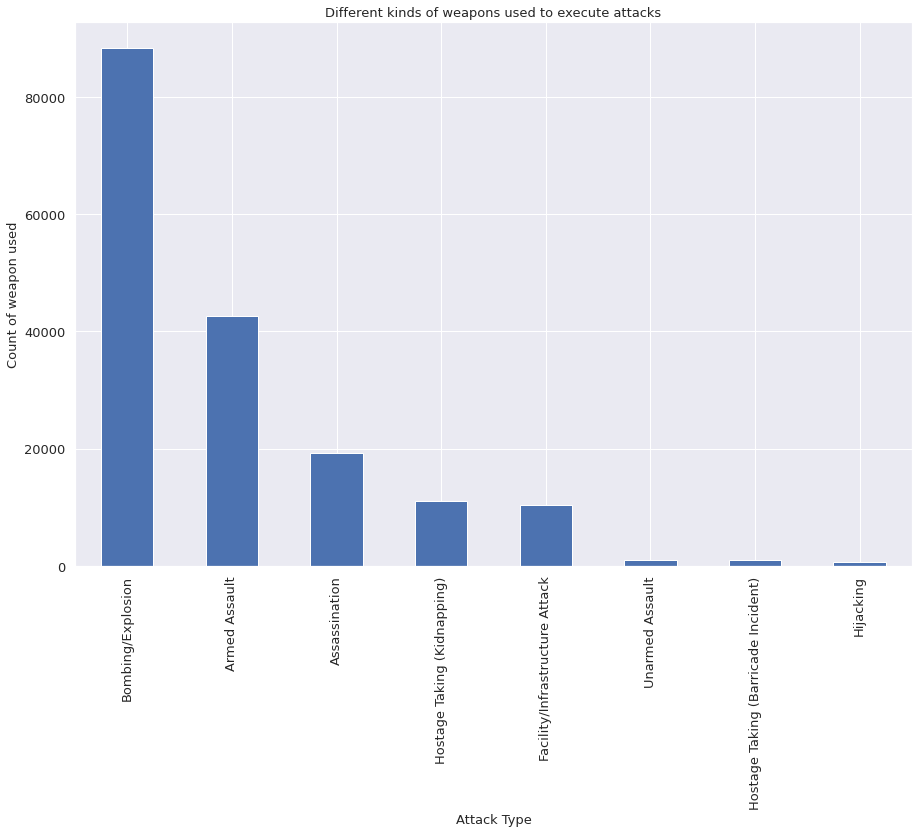

In [66]:
weapons_used = new_df['attack_type'].value_counts().drop('Unknown')
weapons_used.plot(kind = 'bar', figsize = (15,10), fontsize = 13)
plt.title('Different kinds of weapons used to execute attacks', fontsize = 13)
plt.xlabel('Attack Type', fontsize = 13)
plt.ylabel('Count of weapon used', fontsize = 13)
plt.show()


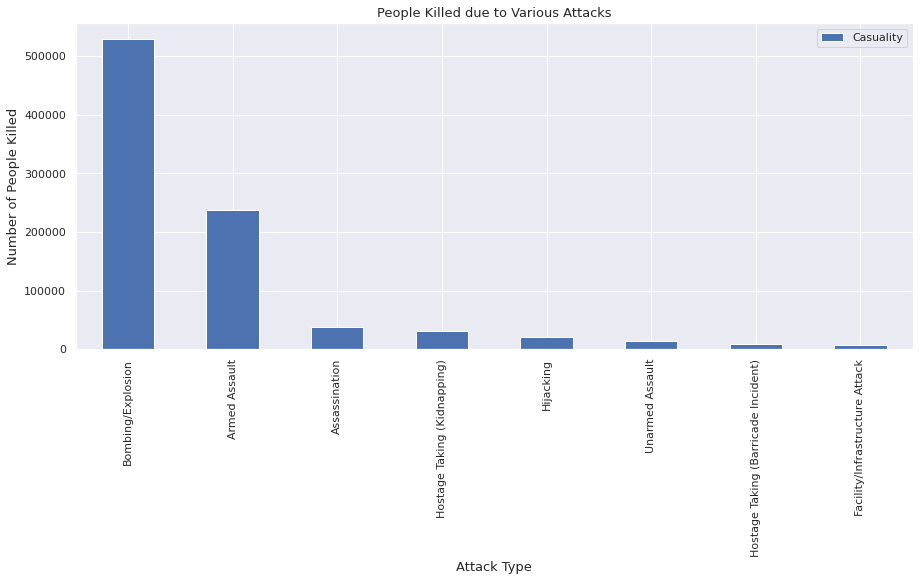

In [64]:
attack_killed = new_df[["attack_type","Casuality"]].groupby("attack_type").sum().drop('Unknown').sort_values(by="Casuality",ascending=False)
attack_killed.plot(kind="bar", figsize=(15,6))
plt.title("People Killed due to Various Attacks",fontsize=13)
plt.xlabel("Attack Type",fontsize=13)
plt.ylabel("Number of People Killed",fontsize=13)
plt.show()

In [65]:
attack_killed

,Casuality
attack_type,
Bombing/Explosion,530007.0
Armed Assault,237663.0
Assassination,38807.0
Hostage Taking (Kidnapping),30677.0
Hijacking,20719.0
Unarmed Assault,14907.0
Hostage Taking (Barricade Incident),8444.0
Facility/Infrastructure Attack,7407.0


Bombing Weapons and Explosives were mostly used weapons in attacks followed by Armed Assault. While Hijacking is the least used weapon in executing attacks. Casualities because of bombing were - 5,30,007

## 6. How many attacks were successes and how many of them were failures?

1    161632
0     20059
Name: Success, dtype: int64


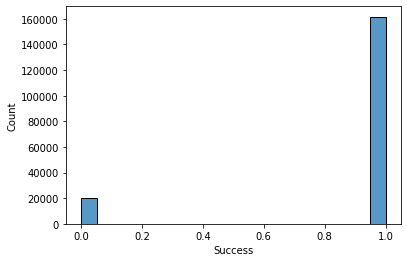

In [29]:
print(new_df['Success'].value_counts())
sns.histplot(data=new_df, x="Success")
sns.set(rc={'figure.figsize':(11,8)})

#### In this case, 1 denotes success and 0 denotes failure. Terrorists were successful in executing 161632 attacks but failed in 20,059 attacks.

## 7. What were the most targeted sites?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


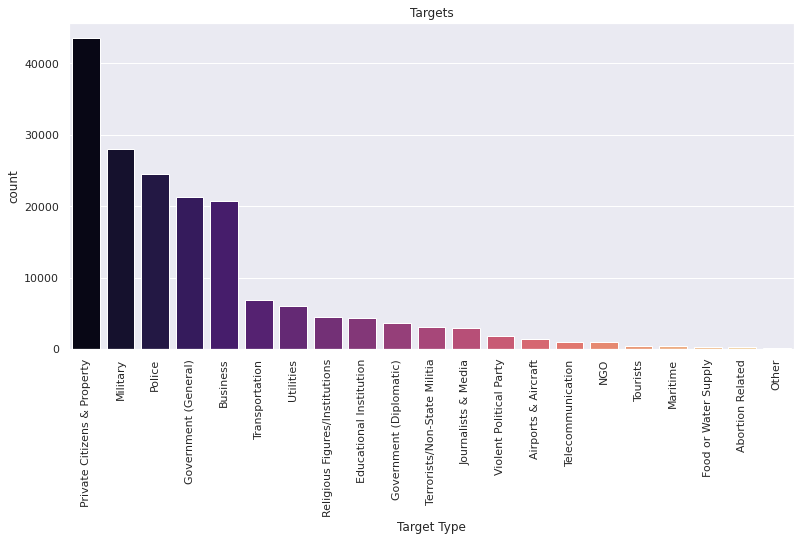

In [61]:
plt.figure(figsize = (13,6))
sns.countplot(new_df['target_type'], order = new_df['target_type'].value_counts().drop('Unknown').index, palette = 'magma')
plt.xticks(rotation = 90)
plt.xlabel('Target Type')
plt.title('Targets')
plt.show()

#### From the above Visualisation we can see that the main target of these attacks are Private Properties, Citizens, Military, Police, Government, Businesses 

## Q.8 Which countries have been the most affected by these attacks? What is India's position in this? Also Plot for the regionwise distribution.

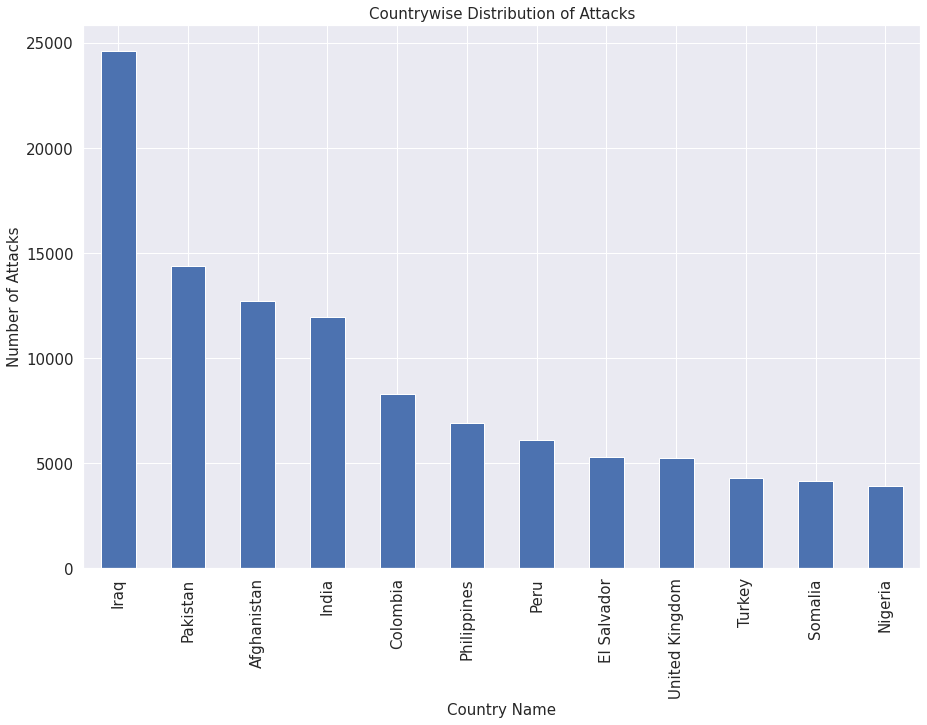

In [31]:
countrywise_distribution = new_df['country'].value_counts()[:12]
countrywise_distribution.plot(kind = 'bar', figsize = (15,10), fontsize = 15)
plt.title('Countrywise Distribution of Attacks', fontsize = 15)
plt.xlabel('Country Name', fontsize = 15)
plt.ylabel('Number of Attacks', fontsize = 15)
plt.show()

#### As we can see Iraq is the most suffered country with 24,636 attacks followed by Pakistan with 14,368. India's position is 4th with 11,960 attacks. And Afghanistan with 12,731 attacks

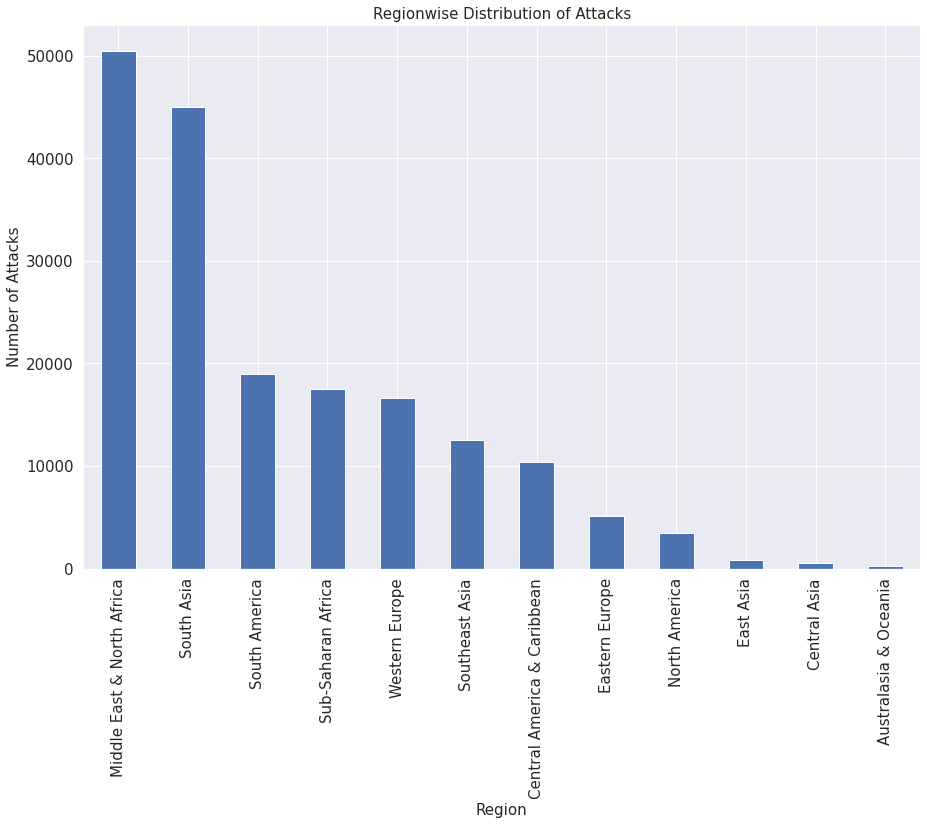

In [32]:
countrywise_distribution = new_df['region'].value_counts()[:12]
countrywise_distribution.plot(kind = 'bar', figsize = (15,10), fontsize = 15)
plt.title('Regionwise Distribution of Attacks', fontsize = 15)
plt.xlabel('Region', fontsize = 15)
plt.ylabel('Number of Attacks', fontsize = 15)
plt.show()

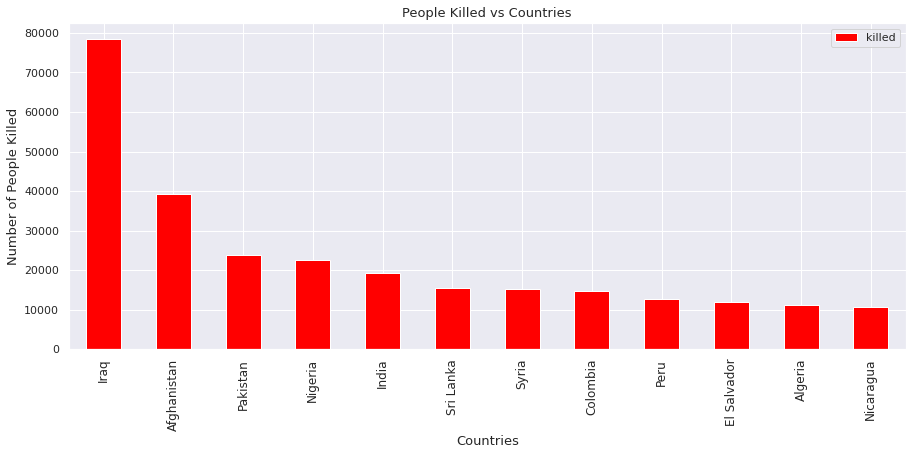

In [33]:
# People Killed vs Countries
people_killed = new_df[["country","killed"]].groupby("country").sum().sort_values(by="killed",ascending=False)[:12]
people_killed.plot(kind="bar",color="red",figsize=(15,6))
plt.title("People Killed vs Countries",fontsize=13)
plt.xlabel("Countries",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of People Killed",fontsize=13)
plt.show()

In [34]:
people_killed.head()

,killed
country,
Iraq,78589.0
Afghanistan,39384.0
Pakistan,23822.0
Nigeria,22682.0
India,19341.0


#### In Iraq from 1970 to 2017, number of people killed is equal to - 78,589 because of terrorist activities.

#### In India from 1970 to 2017, number of People Killed is equal to - 19,341 because of terrorist activities.

## Q.9 Name the country with minimum number of attacks.

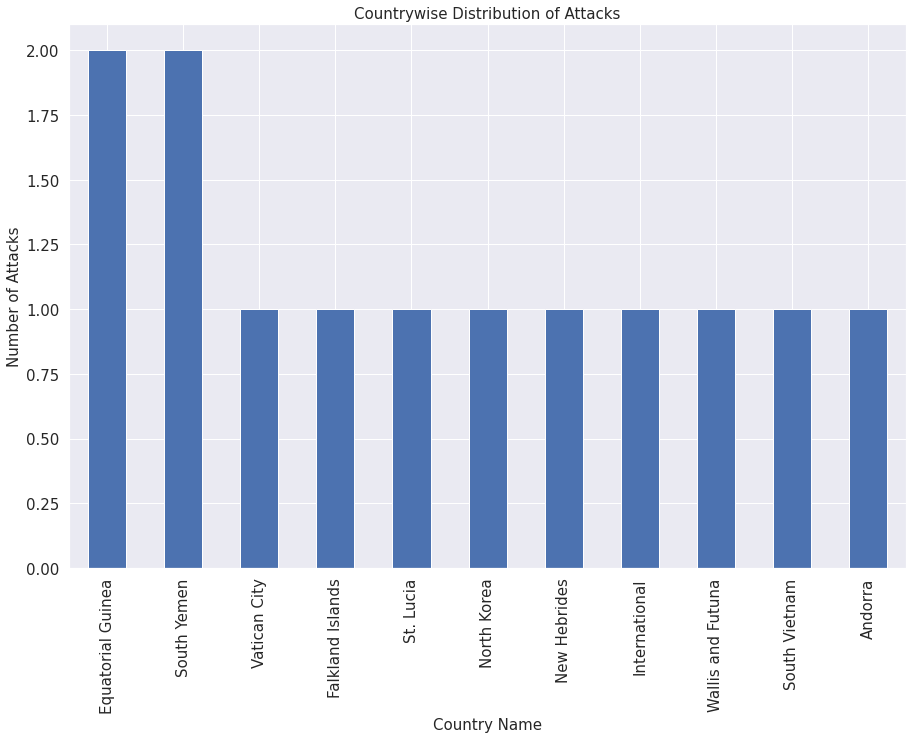

In [35]:
minimum_attack_distribution = new_df['country'].value_counts()[-12:-1]  #To get the last 11 countries with lowest number of attacks
minimum_attack_distribution.plot(kind = 'bar', figsize = (15,10), fontsize = 15)
plt.title('Countrywise Distribution of Attacks', fontsize = 15)
plt.xlabel('Country Name', fontsize = 15)
plt.ylabel('Number of Attacks', fontsize = 15)
plt.show()

#### The Minimum number of attack is 1 that can be seen in many countries from the above plot. It can be said that country with minimum number of attack was Vatican City with many more


## Q.10 Activities of Different Terrorist Groups between 1970-2017.

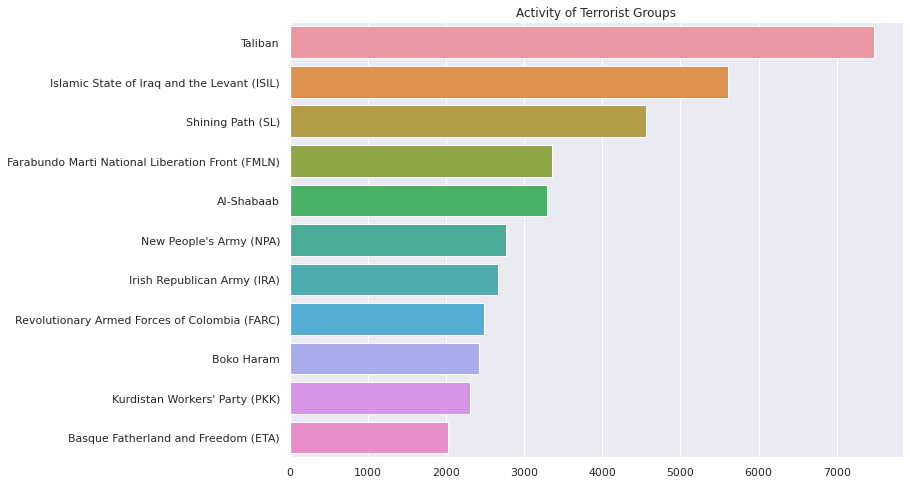

In [36]:
sns.barplot(y = new_df['group_name'].value_counts()[1:12].index, x = new_df['group_name'].value_counts()[1:12].values)
#Here 'y = new_df['group_name'].value_counts()[1:12].index' will give all the name of different terrorist organisations
# And 'x = new_df['group_name'].value_counts()[1:12].values)' will give the number of attacks they have done from 1970-2017
plt.title('Activity of Terrorist Groups')
plt.show()

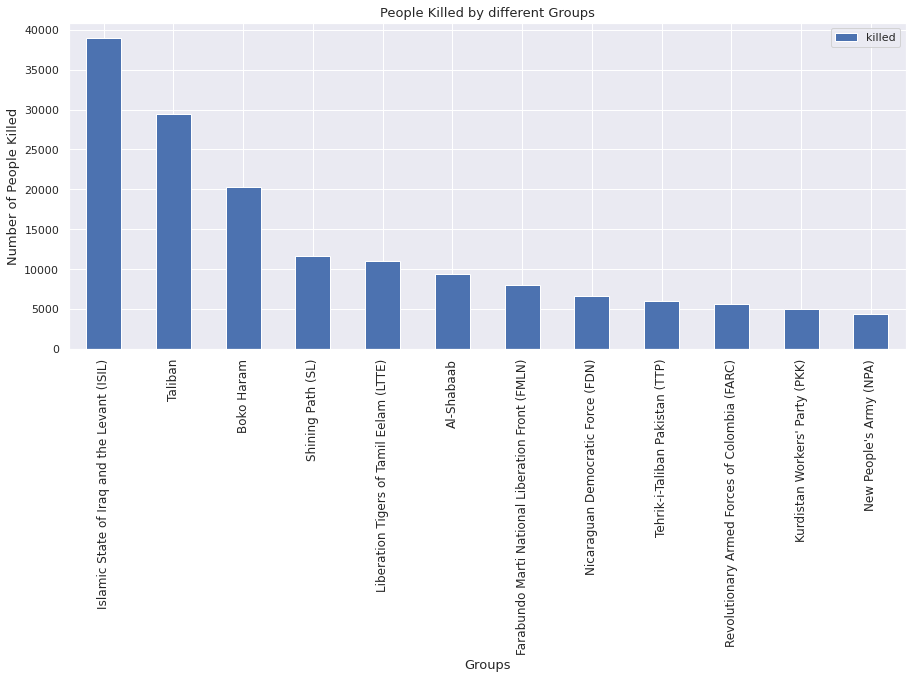

In [37]:
# People Killed by each terrorist group
people_killed_by_groups = new_df[["group_name","killed"]].groupby("group_name").sum().sort_values(by="killed",ascending=False).drop('Unknown')[:12]
people_killed_by_groups.plot(kind="bar",figsize=(15,6))
plt.title("People Killed by different Groups",fontsize=13)
plt.xlabel("Groups",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of People Killed",fontsize=13)
plt.show()

In [38]:
people_killed_by_groups.head()

,killed
group_name,
Islamic State of Iraq and the Levant (ISIL),38923.0
Taliban,29410.0
Boko Haram,20328.0
Shining Path (SL),11601.0
Liberation Tigers of Tamil Eelam (LTTE),10989.0


### **Piechart of Top 5 Groups with Number of Killings**

In [39]:
from matplotlib import pyplot as plt
People_killed_byGroups = new_df[['killed', 'group_name']].groupby('group_name').sum().drop('Unknown').sort_values(by = 'killed', ascending = False)
Grp_involved = list(People_killed_byGroups.index)[:5]
Ppl_killed = People_killed_byGroups.values[:5]
result = Ppl_killed.flatten()
result

array([38923., 29410., 20328., 11601., 10989.])

Text(0.5, 1.0, 'Top 5 Groups with Number of Killings')

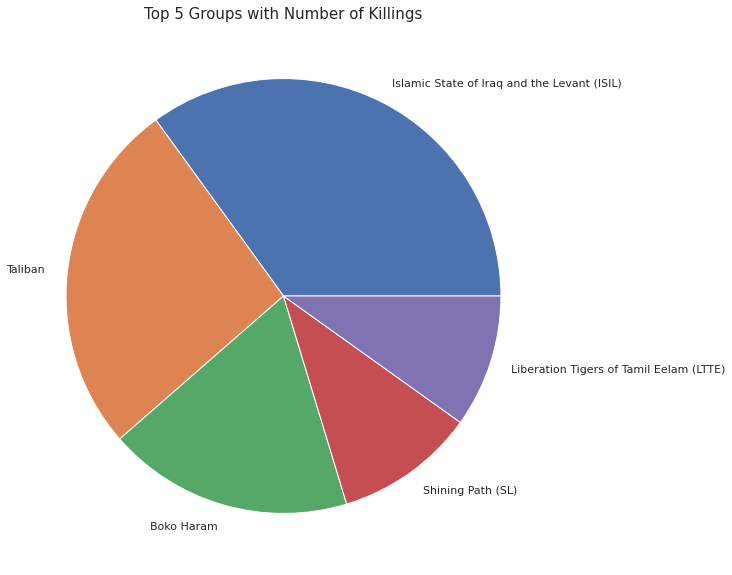

In [40]:
fig = plt.figure(figsize =(10, 10))
plt.pie(result, labels = Grp_involved)
plt.title('Top 5 Groups with Number of Killings', fontsize = 15)

#### It is Clearly Visible that Taliban is the most active terrorist organization with 7478 attacks. And Groups with minmum activities are Kenyan rebels from Uganda, Krikapi Indians etc. While on the other hand Islamic State of Iraq and the Levant (ISIL) is the group with maximum number of killings followed by Taliban.

## Q.11 Citywise Distribution of Terrorist Attacks. Which city is mostly affected by these attacks

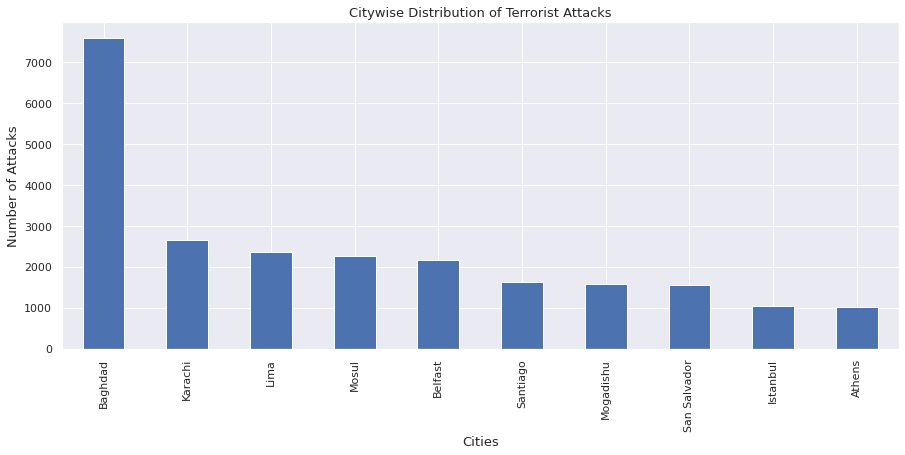

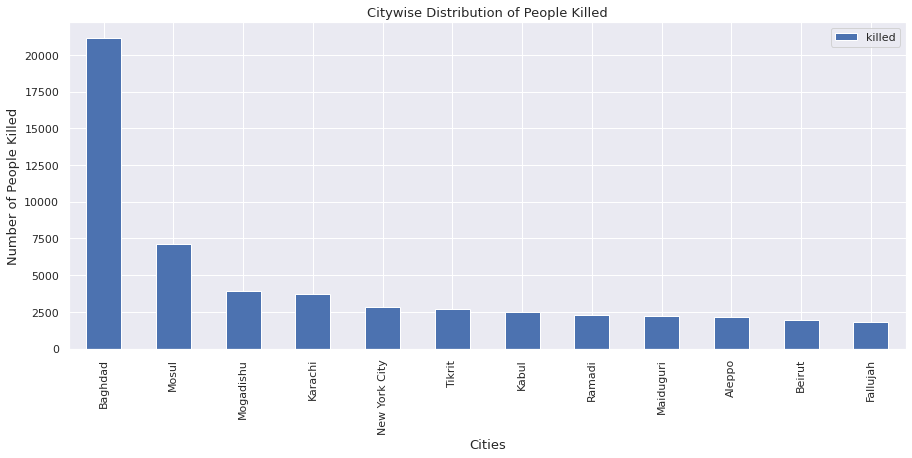

In [41]:
city=df["city"].value_counts()[1:11]
city.plot(kind="bar", figsize=(15,6))
plt.title("Citywise Distribution of Terrorist Attacks",fontsize=13)
plt.xlabel("Cities",fontsize=13)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

city_killings = new_df[['city', 'killed']].groupby('city').sum().sort_values(by = 'killed', ascending = False).drop('Unknown')[:12]
city_killings.plot(kind="bar", figsize=(15,6))
plt.title("Citywise Distribution of People Killed",fontsize=13)
plt.xlabel("Cities",fontsize=13)
plt.ylabel("Number of People Killed",fontsize=13)
plt.show()

In [42]:
city.head()

Baghdad    7589
Karachi    2652
Lima       2359
Mosul      2265
Belfast    2171
Name: city, dtype: int64

In [43]:
city_killings.head()

,killed
city,
Baghdad,21151.0
Mosul,7140.0
Mogadishu,3913.0
Karachi,3688.0
New York City,2838.0


#### Baghdad is the city with maximum number of attacks, and killings.

## Q.12 Most Active Groups in Particular Countries

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


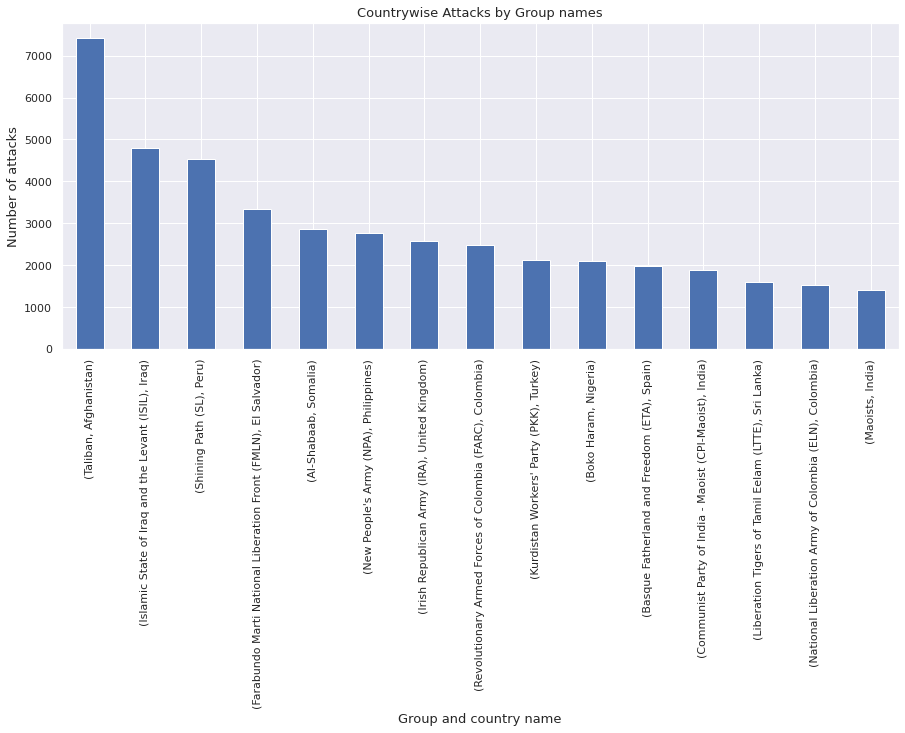

In [44]:
most_active_groups_countrywise = new_df[['group_name', 'country']].value_counts().drop('Unknown')[:15]
most_active_groups_countrywise.plot(kind="bar", figsize=(15,6))
plt.title("Countrywise Attacks by Group names",fontsize=13)
plt.xlabel("Group and country name",fontsize=13)
plt.ylabel("Number of attacks",fontsize=13)
plt.show()

In [45]:
most_active_groups_countrywise

group_name                                        country       
Taliban                                           Afghanistan       7423
Islamic State of Iraq and the Levant (ISIL)       Iraq              4797
Shining Path (SL)                                 Peru              4541
Farabundo Marti National Liberation Front (FMLN)  El Salvador       3330
Al-Shabaab                                        Somalia           2867
New People's Army (NPA)                           Philippines       2770
Irish Republican Army (IRA)                       United Kingdom    2575
Revolutionary Armed Forces of Colombia (FARC)     Colombia          2468
Kurdistan Workers' Party (PKK)                    Turkey            2109
Boko Haram                                        Nigeria           2087
Basque Fatherland and Freedom (ETA)               Spain             1975
Communist Party of India - Maoist (CPI-Maoist)    India             1877
Liberation Tigers of Tamil Eelam (LTTE)           Sri Lanka

#### The Taliban is predominantly active in Afghanistan, where it has carried out 7423 assaults, and ISIL is mostly active in Iraq, where it has carried out 4797 attacks. In India Maoists group has executed most number of attacks i.e. 1396.

## Q.13 Looking into the Attacks carried out in India

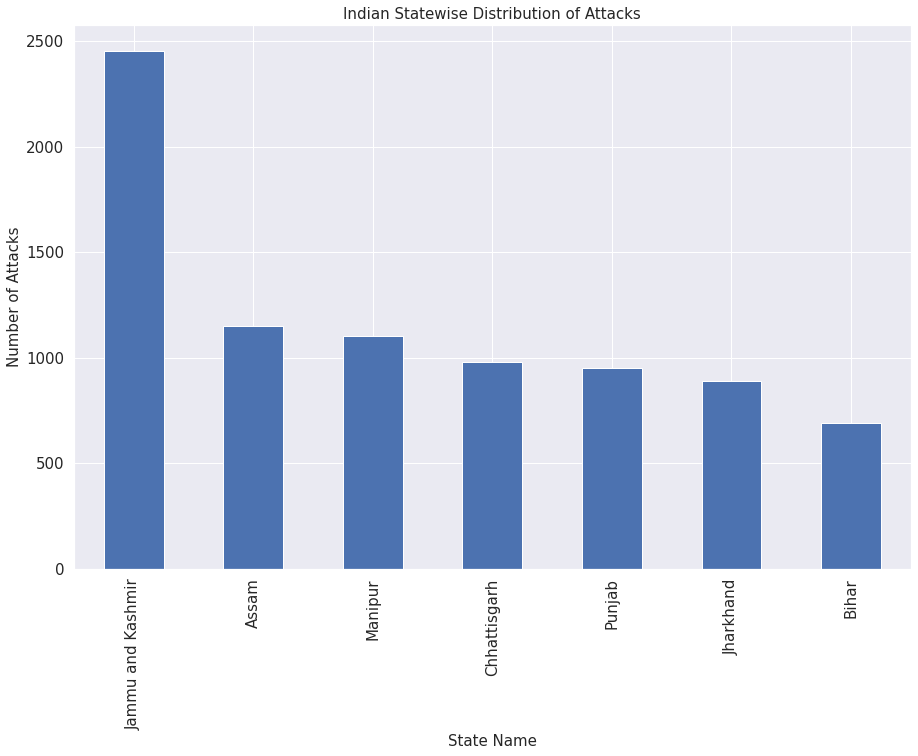

In [46]:
India = new_df[new_df['country'] == 'India']

Statewise_distribution = India['state'].value_counts()[:7]
Statewise_distribution.plot(kind = 'bar', figsize = (15,10), fontsize = 15)
plt.title('Indian Statewise Distribution of Attacks', fontsize = 15)
plt.xlabel('State Name', fontsize = 15)
plt.ylabel('Number of Attacks', fontsize = 15)
plt.show()


In [47]:
Statewise_distribution.head()

Jammu and Kashmir    2454
Assam                1151
Manipur              1100
Chhattisgarh          979
Punjab                949
Name: state, dtype: int64

#### It can be seen that Jammu Kashmir faced the most terrorism that is 2454 attacks followed by Assam and Manipur.

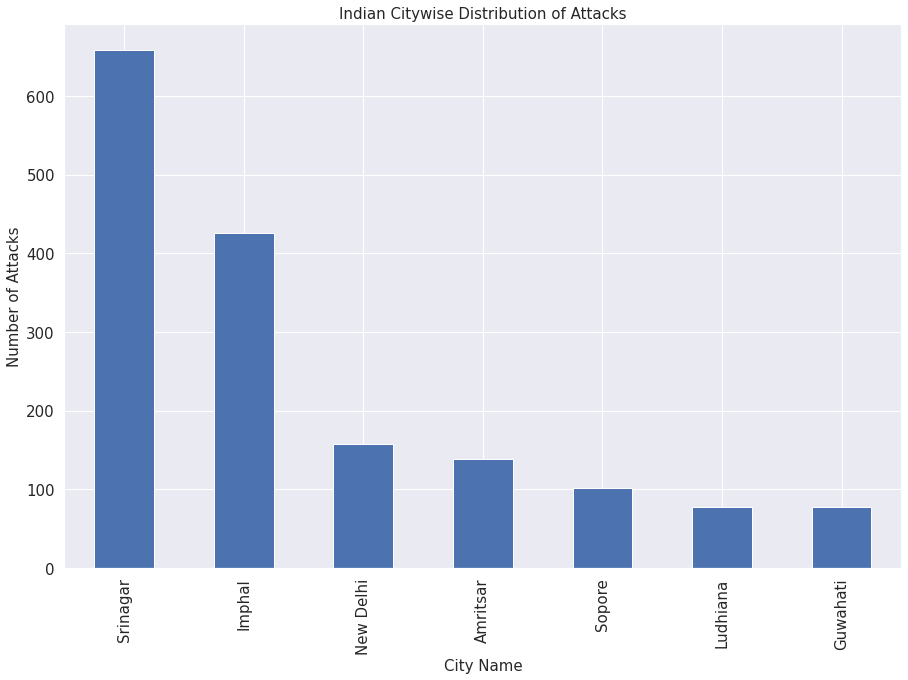

In [48]:
citywise_distribution = India['city'].value_counts().drop('Unknown')[:7]
citywise_distribution.plot(kind = 'bar', figsize = (15,10), fontsize = 15)
plt.title('Indian Citywise Distribution of Attacks', fontsize = 15)
plt.xlabel('City Name', fontsize = 15)
plt.ylabel('Number of Attacks', fontsize = 15)
plt.show()

In [49]:
citywise_distribution.head()

Srinagar     658
Imphal       426
New Delhi    157
Amritsar     138
Sopore       102
Name: city, dtype: int64

Srinagar and Imphal are top 2 cities that suffered most terrorism

1    10280
0     1680
Name: Success, dtype: int64


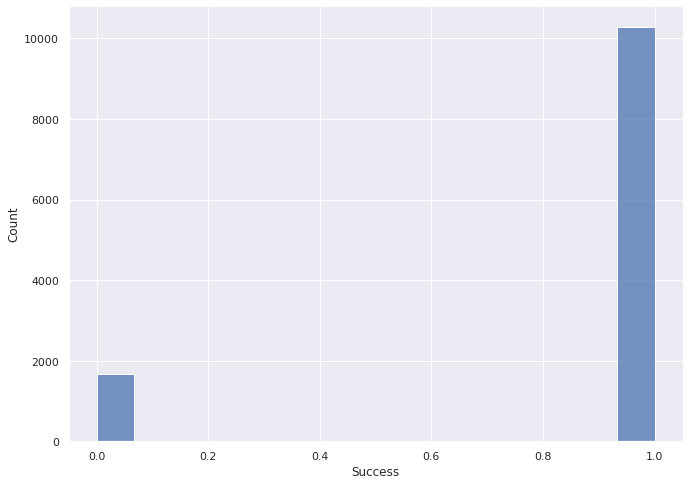

In [50]:
print(India['Success'].value_counts())
sns.histplot(data=India, x="Success")
sns.set(rc={'figure.figsize':(11,8)})

In [51]:
India['Success'].value_counts()

1    10280
0     1680
Name: Success, dtype: int64

Terrorists were successful in carrying out 10,280 attacks in India, and failed 1680 times.

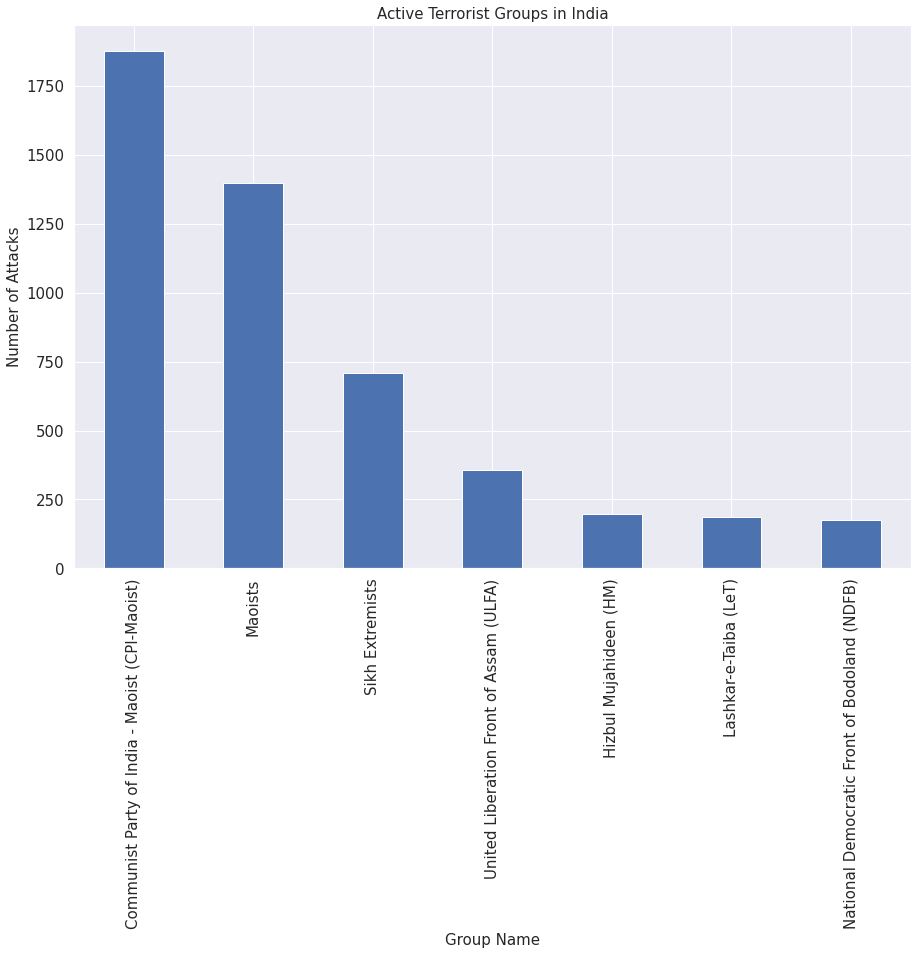

In [52]:
active_groups = India['group_name'].value_counts().drop('Unknown')[:7]
active_groups.plot(kind = 'bar', figsize = (15,10), fontsize = 15)
plt.title('Active Terrorist Groups in India', fontsize = 15)
plt.xlabel('Group Name', fontsize = 15)
plt.ylabel('Number of Attacks', fontsize = 15)
plt.show()

In [53]:
active_groups

Communist Party of India - Maoist (CPI-Maoist)    1877
Maoists                                           1396
Sikh Extremists                                    710
United Liberation Front of Assam (ULFA)            357
Hizbul Mujahideen (HM)                             199
Lashkar-e-Taiba (LeT)                              187
National Democratic Front of Bodoland (NDFB)       174
Name: group_name, dtype: int64

Communist Party of India - Maoist (CPI-Maoist) is the most active group in spreading terrorism across India. Top active groups after Maoist are Maoists, and Sikh Extremists. While Hizbul Mujahideen and Lashkar-e-Taiba are almost equal to each other in carrying out attacks.

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


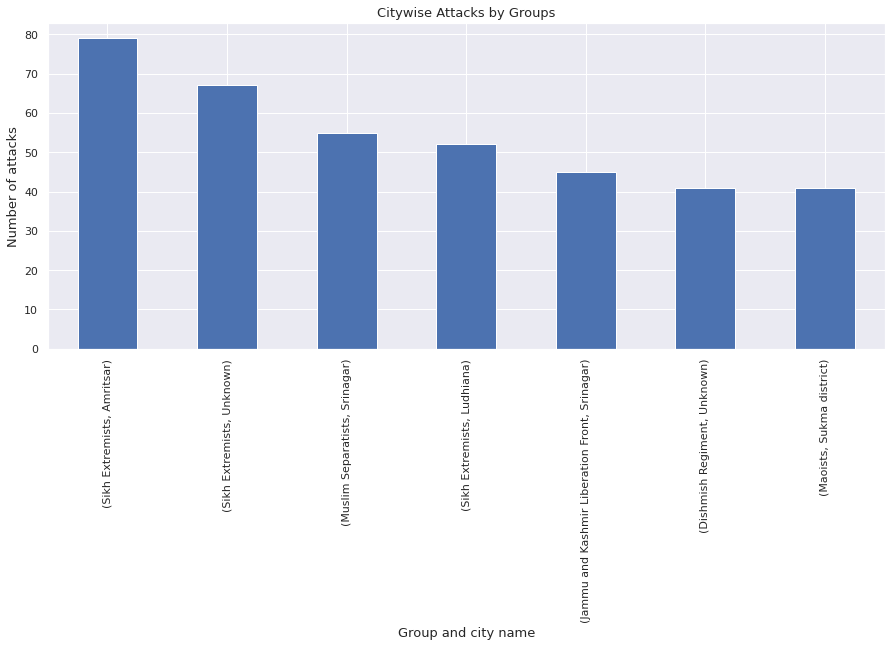

In [54]:
most_active_groups_citywise = India[['group_name', 'city']].value_counts().drop('Unknown')[:7]
most_active_groups_citywise.plot(kind="bar", figsize=(15,6))
plt.title("Citywise Attacks by Groups",fontsize=13)
plt.xlabel("Group and city name",fontsize=13)
plt.ylabel("Number of attacks",fontsize=13)
plt.show()

In [55]:
most_active_groups_citywise

group_name                          city          
Sikh Extremists                     Amritsar          79
                                    Unknown           67
Muslim Separatists                  Srinagar          55
Sikh Extremists                     Ludhiana          52
Jammu and Kashmir Liberation Front  Srinagar          45
Dishmish Regiment                   Unknown           41
Maoists                             Sukma district    41
dtype: int64

Sikh Extremists were most active in Amritsar, and Ludhiana from the year 1970-2017. And Muslim Separatists were at the second rank in carrying out most attacks in Srinagar.

## Q.14 World-Wide Effects of Terrorism

In [56]:
casualities = new_df.loc[:, 'Casuality'].sum()
print('Total Number of Casualities from the year 1970 to 2017 because of terrorism are: ', casualities)

Total Number of Casualities from the year 1970 to 2017 because of terrorism are:  935737.0


In [57]:
killed = new_df.loc[:, 'killed'].sum()
print('Total Number of People killed from the year 1970 to 2017 because of terrorism are: ', killed)

Total Number of People killed from the year 1970 to 2017 because of terrorism are:  411868.0


In [58]:
wounded = new_df.loc[:, 'wounded'].sum()
print('Total Number of wounded people from the year 1970 to 2017 because of terrorism are: ', wounded)

Total Number of wounded people from the year 1970 to 2017 because of terrorism are:  523869.0


# **Observations:**

#### 1. Iraq is the most suffered country with 24,636 attacks followed by Pakistan with 14,368. India's position is 4th with 11,960 attacks. And Afghanistan with 12,731 attacks

#### 2. Middle East and North African Countries are the Prime targets for terrorist organizations.

#### 3. Maximum Number of Attacks happened in the year of 2014, i.e. 16903, it was also the year with maximum number of casualities. And the minimum Number of Attacks happened in the year of 1971, i.e. 471.

#### 4. There is a peak increase in attacks after 2010 in almost every region, with the Middle East and North African nations topping the list due to the highest number of attacks, and then comes South asian countries at the second position.

#### 5. The percentage at which the number of attacks have increased from 1970 to 2017 is:  94.03 %

#### 6. Bombing Weapons and Explosives were mostly used weapons in attacks followed by Armed Assault. While Hijacking is the least used weapon in executing attacks. Casualities because of bombing were - 5,30,007.

#### 7. Terrorists were successful in executing 161632 attacks but failed in 20,059 attacks.

#### 8. The main target sites for terrorism are Private Citizens and Peoperties, Military, Police, Government, Businesses.

#### 9. In Iraq from 1970 to 2017, number of people killed is equal to - 78,589 because of terrorist activities. ***In India from 1970 to 2017, number of People Killed is equal to - 19,341 because of terrorist activities.***

#### 10. With 7478 attacks, the Taliban is the most active terrorist organisation, followed by ISIL (at second position). On the other side, the Islamic State of Iraq and the Levant (ISIL) is the group with the most killings, followed by the Taliban.

#### 11. Baghdad (Capital Of Iraq) has been the worst hit by terrorism.

#### 12. Taliban is predominantly active in Afghanistan, where it has carried out 7423 assaults, and ISIL is mostly active in Iraq, where it has carried out 4797 attacks. In India Maoists group has executed most number of attacks i.e. 1396.

#### 13. In India Jammu Kashmir faced the most terrorism that is 2454 attacks followed by Assam and Manipur. Srinagar and Imphal are top 2 cities which suffered most terrorism between 1970-2017

#### 14. Communist Party of India - Maoist (CPI-Maoist) is the most active group in spreading terrorism across India, it has carried out 1877 attacks.

#### 15. Top active groups after Maoist are Maoists, and Sikh Extremists. While Hizbul Mujahideen and Lashkar-e-Taiba are almost equal to each other in carrying out attacks (190 attacks).

#### 16. Sikh Extremists were most active in Amritsar, and Ludhiana from the year 1970-2017. Reason behind this could be the motive to build Khalistan (separate homeland for sikhs). And Muslim Separatists were second most active groups in terms of terrorist activities and they are mostly active in Srinagar.


#### 17. Total Number of Casualities from the year 1970 to 2017 because of terrorism are:  9,35,737.0

#### 18. Total Number of People killed from the year 1970 to 2017 because of terrorism are:  4,11,868.0

#### 19. Total Number of People wounded from the year 1970 to 2017 because of terrorism are:  5,23,869.0

#### 20. People constantly blame Muslims for spreading terrorism, despite the reality that Muslims have endured the most terrorism. These are the individuals who are most impacted by terrorist operations; according to the visuals and above conclusions from EDA, Iraq, Afghanistan, and Pakistan appear to be the most damaged countries. These are all Muslim-majority countries.

